## Data processing

In [2]:
# import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# Data samples
df = pd.read_csv('./hmeq.csv')
df.sample(8)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5673,1,40400,83786.0,131000.0,DebtCon,Office,34.0,NaN,13.0,210.600000,3.0,36.0,NaN
4779,1,25000,39000.0,72500.0,DebtCon,Other,3.0,0.0,1.0,114.666667,3.0,22.0,NaN
3895,0,20400,68928.0,98587.0,HomeImp,Office,13.0,0.0,0.0,153.578135,0.0,13.0,36.176092
575,1,7500,63500.0,86125.0,HomeImp,Other,5.0,0.0,0.0,136.100000,0.0,8.0,NaN
5900,1,61400,46126.0,83800.0,NaN,Other,33.0,0.0,1.0,339.900000,1.0,23.0,NaN
4243,0,22100,60396.0,101741.0,DebtCon,Office,8.0,NaN,0.0,97.023226,1.0,17.0,35.681521
2525,1,15000,4734.0,55500.0,HomeImp,Other,24.0,2.0,0.0,14.600000,1.0,1.0,NaN
1545,0,11300,NaN,28600.0,HomeImp,Office,20.0,0.0,0.0,190.031218,0.0,15.0,39.008673


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [5]:
# Information of missing values
df.isna().sum()
miss = pd.DataFrame(data = [df.columns,df.isna().sum()/df.shape[0]])
miss # percentage of missing values in each column

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
1,0.0,0.0,0.086913,0.018792,0.042282,0.046812,0.086409,0.118792,0.097315,0.051678,0.08557,0.037248,0.212584


In [6]:
# Drop rows with more than 5 missing values
misscol = ['MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG','DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
df = df.dropna(subset=misscol, thresh=5, axis='rows')
df.isna().sum()
miss_new = pd.DataFrame(data = [df.columns,df.isna().sum()/df.shape[0]])
miss_new # new percentage of missing values in each column

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
1,0.0,0.0,0.075591,0.016284,0.028625,0.029825,0.069935,0.09976,0.07782,0.031196,0.065821,0.016455,0.21049


In [7]:
# Fill in the missing values
# for numerical values, using median
ncols=['LOAN','MORTDUE', 'VALUE', 'YOJ', 'DELINQ','DEROG','CLAGE', 'NINQ','CLNO','DEBTINC']
for col in ncols:
    df[col].fillna(df[col].median(),inplace=True)

# For categorical values
# reason
reason_dist = df['REASON'].value_counts(normalize=True)
if reason_dist.max() > 0.7:
    df['REASON'].fillna(reason_dist.idxmax(), inplace=True)
else:
    df['REASON'].fillna('Unknown', inplace=True)
# job  
job_dist = df['JOB'].value_counts(normalize=True)
if job_dist.max() > 0.7:
    df['JOB'].fillna(job_dist.idxmax(), inplace=True)
else:
    df['JOB'].fillna('Unknown', inplace=True)

print(df['REASON'].value_counts())
print(df['JOB'].value_counts())

df.isna().sum()
after_fill = pd.DataFrame(data = [df.columns,df.isna().sum()/df.shape[0]])
after_fill

REASON
DebtCon    3914
HomeImp    1753
Unknown     167
Name: count, dtype: int64
JOB
Other      2374
ProfExe    1274
Office      945
Mgr         765
Self        193
Unknown     174
Sales       109
Name: count, dtype: int64


/var/folders/98/lsc2syg95yv0ysvqbh6k8qdr0000gn/T/ipykernel_2827/2639026403.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace=True)
/var/folders/98/lsc2syg95yv0ysvqbh6k8qdr0000gn/T/ipykernel_2827/2639026403.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = oe.fit_transform(df[categorical_columns])

In [9]:
# Correlation analysis
correlation_matrix = df.corr()
correlation_matrix

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,1.000000,-0.074762,-0.045243,-0.034849,0.043815,-0.005225,-0.058202,0.273656,0.351553,-0.167468,0.172164,-0.004441,0.156406
LOAN,-0.074762,1.000000,0.214294,0.326640,-0.144294,0.052344,0.097166,0.004103,-0.033035,0.088048,0.044479,0.073484,0.062959
MORTDUE,-0.045243,0.214294,1.000000,0.790303,-0.034751,0.088224,-0.076272,-0.048789,0.001596,0.129802,0.032131,0.318805,0.133683
VALUE,-0.034849,0.326640,0.790303,1.000000,-0.005421,0.110128,0.013186,-0.045744,-0.010441,0.169946,-0.003190,0.265650,0.112592
REASON,0.043815,-0.144294,-0.034751,-0.005421,1.000000,0.073856,0.048656,0.013776,0.031437,0.076034,-0.117494,-0.116405,-0.070402
JOB,-0.005225,0.052344,0.088224,0.110128,0.073856,1.000000,-0.037127,-0.003520,-0.045781,0.017194,-0.050577,-0.010537,-0.099888
YOJ,-0.058202,0.097166,-0.076272,0.013186,0.048656,-0.037127,1.000000,-0.058858,0.050540,0.186446,-0.063344,0.032487,-0.049339
DEROG,0.273656,0.004103,-0.048789,-0.045744,0.013776,-0.003520,-0.058858,1.000000,0.169408,-0.079989,0.146107,0.051366,0.018230
DELINQ,0.351553,-0.033035,0.001596,-0.010441,0.031437,-0.045781,0.050540,0.169408,1.000000,0.025784,0.058455,0.160407,0.045597
CLAGE,-0.167468,0.088048,0.129802,0.169946,0.076034,0.017194,0.186446,-0.079989,0.025784,1.000000,-0.109913,0.233661,-0.042598


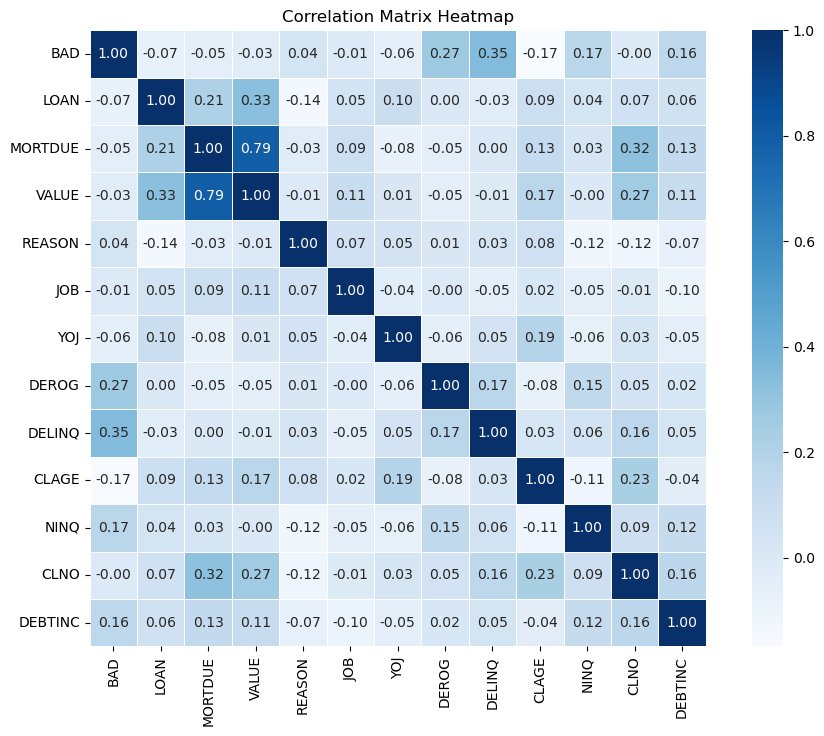

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [11]:
df.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON     float64
JOB        float64
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [12]:
X = df.drop('BAD',axis='columns')
y = df['BAD']
print(X.shape, y.shape)

(5834, 12) (5834,)


In [13]:
# Split training and testing data
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=2)
train_df = pd.DataFrame(x_train).assign(target=y_train.values)
test_df = pd.DataFrame(x_test).assign(target=y_test.values)
train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)
unbalanced = pd.DataFrame(data=[y_train.value_counts(),y_train.value_counts()/y_train.shape[0]])
unbalanced

BAD,0,1
count,3505.000000,870.000000
count,0.801143,0.198857


In [14]:
# Deal with unbalanced data
# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train,y_train=smote.fit_resample(x_train,y_train)
train_df_smt = pd.DataFrame(x_train).assign(target=y_train.values)
train_df_smt.to_csv('train_data_balanced.csv', index=False)

In [15]:
balanced = pd.DataFrame(data=[y_train.value_counts(),y_train.value_counts()/y_train.shape[0]])
balanced

BAD,0,1
count,3505.0,3505.0
count,0.5,0.5
